## Geometric and intensity transformations

**Group 6**
1. Ahmed Ali
2. Nichapat Boonprasertsri
3. Anuphap Chansatit
4. Karthikeyan Jeyabalasuntharam
5. Yat Chit Law
6. Halari Shanpru
7. Vitchaya Siripoppohn
8. Chotiros Srisiam

/var/folders/c9/j2zt988x0y1075yvp8n3hv1m0000gn/T/ipykernel_51128/598176027.py:11: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  f = misc.ascent()  # retrieve a grayscale image


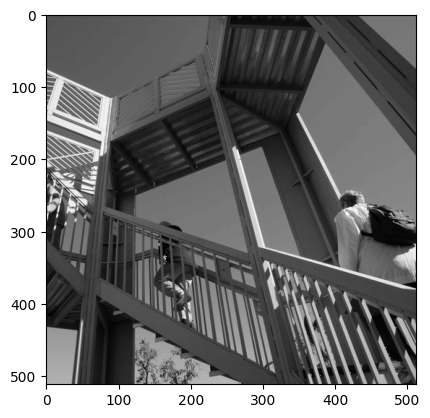

In [10]:
import scipy as sc
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#install skimage: pip install scikit-image
import skimage
from skimage import transform

from scipy import ndimage
f = misc.ascent()  # retrieve a grayscale image
imshow(f, cmap=plt.cm.gray)

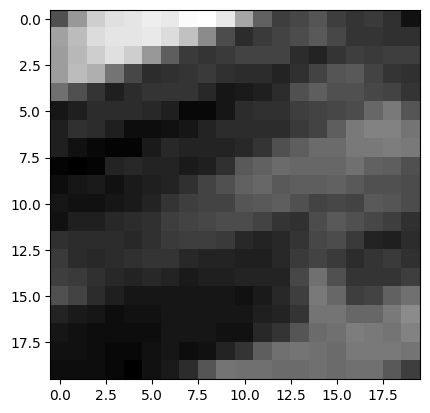

In [11]:
# Explore intensity variations
imshow(f[220:240, 110:130], cmap=plt.cm.gray, interpolation='nearest') 

In [12]:
## Geometric transformations
lx, ly = f.shape
# Cropping
crop_f = f[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_f = np.flipud(f)
# rotation
rotate_f = ndimage.rotate(f, 45)
rotate_f_noreshape = ndimage.rotate(f, 45, reshape=False)

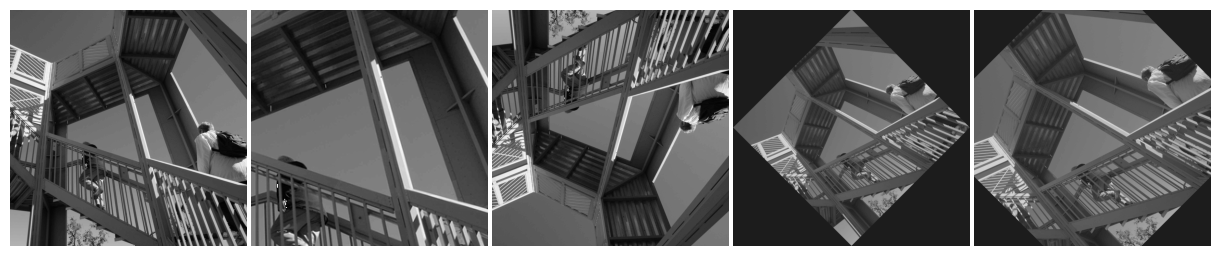

In [13]:

plt.figure(figsize=(12, 3))
plt.subplot(151)
imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
imshow(crop_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
imshow(flip_ud_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
imshow(rotate_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
imshow(rotate_f_noreshape, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

### Translation

Text(0.5, 1.0, 'Translated image')

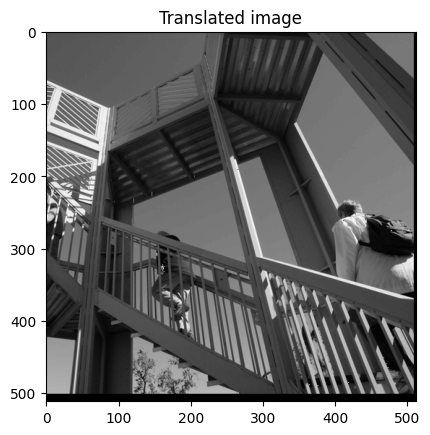

In [14]:
# Recall the shape of the transformation matrix
#[[a0  a1  a2]
# [b0  b1  b2]
# [0   0    1]]
# Lets translate by dx=3 and dy=10 pixels
transl=np.array([[1,0,3],[0,1,10],[0,0,1]])
transl=transl.reshape((3,3))
imshow(transl, cmap='gray')

tf=transform.AffineTransform(matrix=transl, scale=None, rotation=None, shear=None, translation=None)
transl=transform.warp(f, tf, order =1, preserve_range=True, mode='constant')
imshow(transl, cmap='gray')
plt.title("Translated image")

### Shear

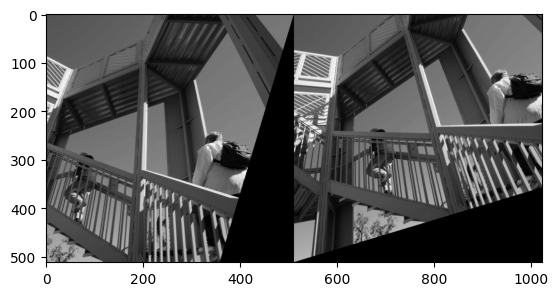

In [15]:
# horizontal
f=f/255.0 # scale to the pixel intensity range (0,1) 
shear1=np.array([[1, 0.3 , 0.0],[0, 1, 0],[0,0,1]])
tf_h=transform.AffineTransform(matrix=shear1, scale=None, rotation=None, shear=None, translation=None)
im1=transform.warp(f, tf_h, order =1, preserve_range=True, mode='constant')
# vertical
shear2=np.array([[1, 0.0 , 0.0],[0.3, 1, 0],[0,0,1]])
tf_v=transform.AffineTransform(matrix=shear2, scale=None, rotation=None, shear=None, translation=None)
im2=transform.warp(f, tf_v, order =1, preserve_range=True, mode='constant')

plt.figure()
imshow(np.hstack([im1,im2]), cmap='gray')

In [16]:
tf_v

<AffineTransform(matrix=
    [[1. , 0. , 0. ],
     [0.3, 1. , 0. ],
     [0. , 0. , 1. ]]) at 0x12f35b0a0>

### Rescaling

In [17]:
f_rescaled=transform.rescale(f, 0.5, anti_aliasing=False)

Text(0.5, 1.0, 'Rescaled image by 50%')

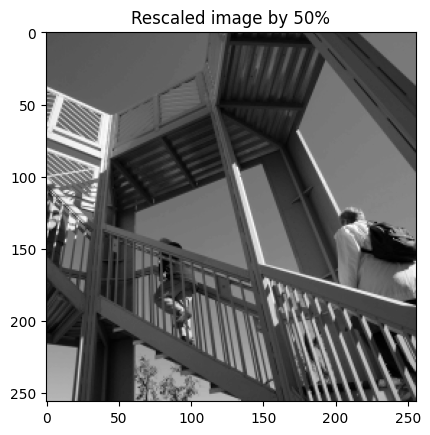

In [18]:
imshow(f_rescaled, cmap='gray')
plt.title("Rescaled image by 50%")

### Resizing 

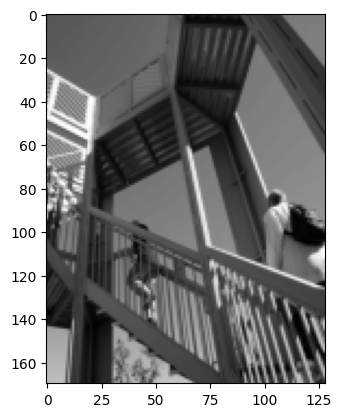

In [19]:
f_resized=transform.resize(f, (int(f.shape[0]/3), f.shape[1]/4), anti_aliasing=True)
imshow(f_resized, cmap='gray')

In [20]:
np.shape(f_resized)

(170, 128)

### Rotation with transform.rotate 

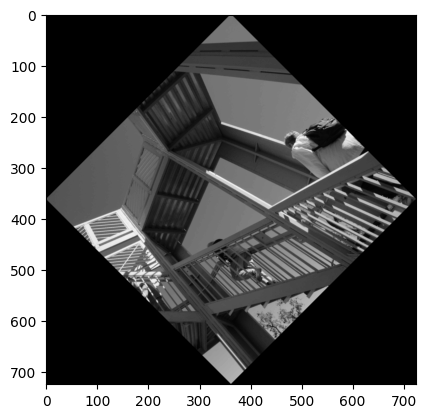

In [21]:
import math

tf=transform.rotate(f, 45, resize=True, mode='constant')
im=tf*255
imshow(im, cmap='gray')


### Question 1:
#### 1.  Using Python skimage.transform functions considered above, perform a horizontal shear by 0.2 and image rescaling by 50% on 'ascent' image (referred to as f).Display the final result.
#### 2. Define a translation matrix for shifting an image by 5 pixels in x-direction and by 10 pixels in y-direction, and apply AffineTransform to translate the image (f=ascent). Display the final result.
#### 3. Start with ascent image (f). Perform a consequent series of operations on an image f, rotate  an image by -45 degrees, then rescale the rotated image by 1.2 and crop it to the 50% of its central part.  


Question 1


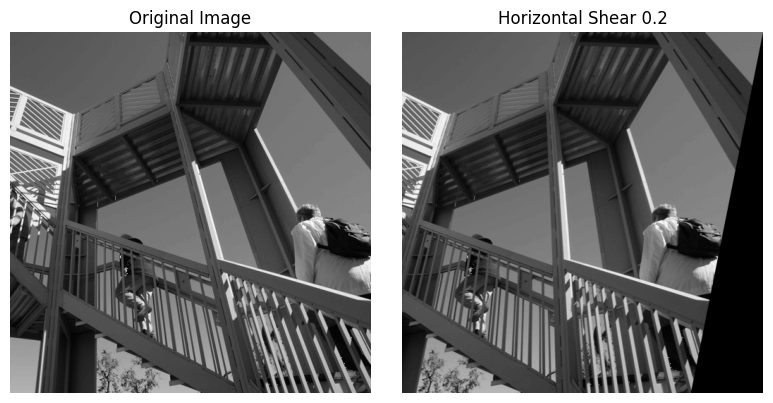

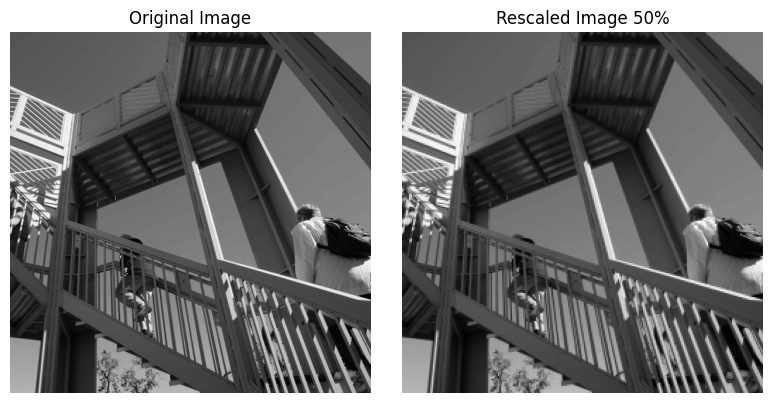

In [25]:
# Leave your answer here
print("Question 1")

shear_horizontal = np.array([[1, 0.2, 0], [0, 1, 0], [0, 0, 1]])
tf_horizontal = transform.AffineTransform(matrix=shear_horizontal)
sheared_image = transform.warp(f, tf_horizontal, order=1, preserve_range=True, mode='constant')

# Display the sheared image
plt.figure(figsize=(8, 4))
plt.subplot(121)
imshow(f, cmap=plt.cm.gray)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
imshow(sheared_image, cmap=plt.cm.gray)
plt.title("Horizontal Shear 0.2")
plt.axis('off')

plt.tight_layout()
plt.show()

# Perform image rescaling by 50%
f_rescaled = transform.rescale(f, 0.5, anti_aliasing=False)

# Display the rescaled image
plt.figure(figsize=(8, 4))
plt.subplot(121)
imshow(f, cmap=plt.cm.gray)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
imshow(f_rescaled, cmap=plt.cm.gray)
plt.title("Rescaled Image 50%")
plt.axis('off')

plt.tight_layout()
plt.show()


Question 2


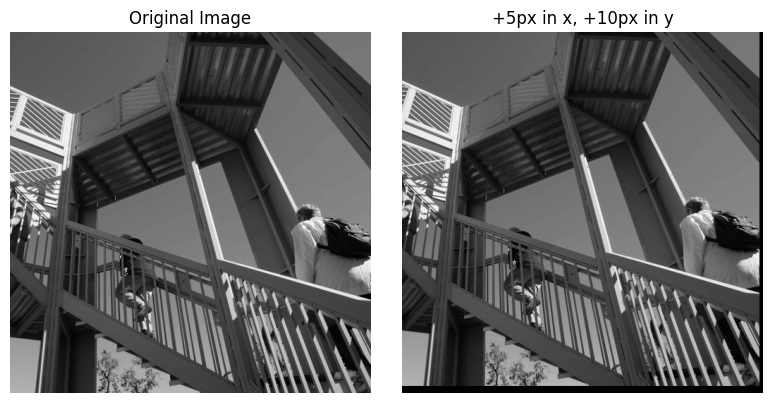

In [27]:
print("Question 2")
translation_matrix = np.array([[1, 0, 5], [0, 1, 10], [0, 0, 1]])

# Create an AffineTransform object
tf_translation = transform.AffineTransform(matrix=translation_matrix)

# Apply the translation to the image
translated_image = transform.warp(f, tf_translation, order=1, preserve_range=True, mode='constant')

# Display the final result
plt.figure(figsize=(8, 4))
plt.subplot(121)
imshow(f, cmap=plt.cm.gray)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
imshow(translated_image, cmap=plt.cm.gray)
plt.title("+5px in x, +10px in y")
plt.axis('off')

plt.tight_layout()
plt.show()

Question 3


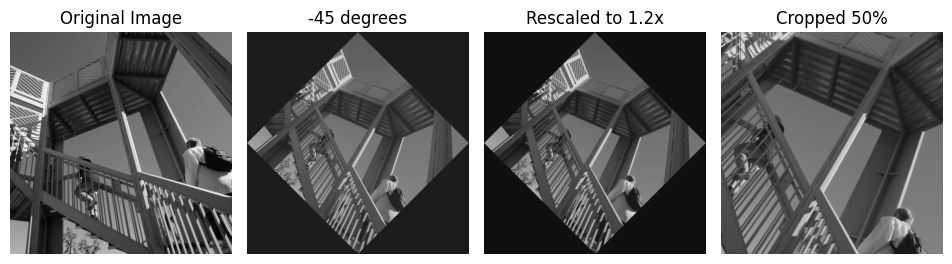

In [30]:
print("Question 3")
# Rotate the image by -45 degrees
rotated_image = ndimage.rotate(f, -45, reshape=True)

# Rescale the rotated image by 1.2
rescaled_image = transform.rescale(rotated_image, scale=1.2, anti_aliasing=False)

# Crop the rescaled image to 50% of its central part
rows, cols = rescaled_image.shape
crop_height = int(rows * 0.5)
crop_width = int(cols * 0.5)
start_row = (rows - crop_height) // 2
start_col = (cols - crop_width) // 2
cropped_image = rescaled_image[start_row:start_row + crop_height, start_col:start_col + crop_width]

# Display the final result
plt.figure(figsize=(12, 3))
plt.subplot(151)
imshow(f, cmap=plt.cm.gray)
plt.title("Original Image")
plt.axis('off')

plt.subplot(152)
imshow(rotated_image, cmap=plt.cm.gray)
plt.title("-45 degrees")
plt.axis('off')

plt.subplot(153)
imshow(rescaled_image, cmap=plt.cm.gray)
plt.title("Rescaled to 1.2x")
plt.axis('off')

plt.subplot(154)
imshow(cropped_image, cmap=plt.cm.gray)
plt.title("Cropped 50%")
plt.axis('off')

plt.tight_layout()
plt.show()

### Gamma correction and log contrast adjustment

Text(0.5, 0, 'Pixel intensity')

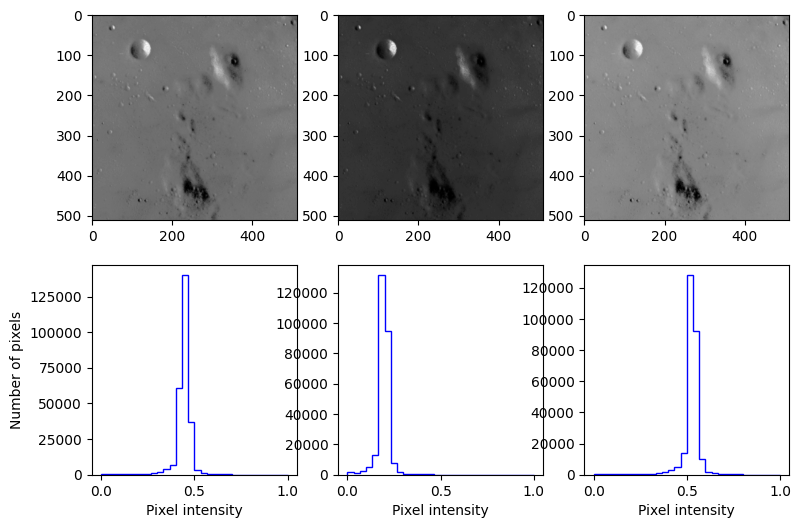

In [32]:
from skimage import data, img_as_float
from skimage import exposure

# Load a low-contrast image
im = data.moon()
im= img_as_float(im)

fig=plt.figure(figsize=(9,6))
axes=np.zeros((2,3), dtype=np.object_)
axes[0,0]=plt.subplot(2,3,1)
axes[0,1]=plt.subplot(2,3,2)
axes[0,2]=plt.subplot(2,3,3)

axes[1,0]=plt.subplot(2,3,4)
axes[1,1]=plt.subplot(2,3,5)
axes[1,2]=plt.subplot(2,3,6)
ax_im, ax_hist = axes

# Gamma corrected
gamma_corrected = exposure.adjust_gamma(im, 2)

# logarithmic corrected
logarithmic_corrected = exposure.adjust_log(im, 1)

#__________________________
# Display image
ax_im[0].imshow(im, cmap='gray')
#Display histogram for original image
ax_hist[0].hist(im.ravel(), bins=30, histtype='step', color='b' )
ax_hist[0].set_xlabel('Pixel intensity')
ax_hist[0].set_ylabel('Number of pixels')

ax_im[1].imshow(gamma_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[1].hist(gamma_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[1].set_xlabel('Pixel intensity')

ax_im[2].imshow(logarithmic_corrected, cmap='gray')
#Display histogram for gamma-corrected image
ax_hist[2].hist(logarithmic_corrected.ravel(), bins=30, histtype='step', color='b' )
ax_hist[2].set_xlabel('Pixel intensity')

### Question 2: 
1. Describe the effect of Gamma-correction on the distribution of pixel intensities.
2. How does logarithmic transformation improve the quality of an image?
3. Perform Gamma-transformation of the moon image with the value of  $\gamma$ < 1. What effect do you observe on pixel intensities of the original image? How is you result compared against Gamma-corrected pixel intensities obtained with $\gamma$=2?

Answer: 
1) The refined image is more brighter than original image, and the fine details are enhanced, making it more visually appealing.
2) Enhancing visibility in darker areas, revealing details, reducing clipping, and enhancing contrast

3.1) The gamma image with 𝛾 < 1, the overall brightness is reduced. The image appears darker, and the lower-intensity values are emphasized.

3.2) The gamma image with 𝛾 = 2 is brighter and has reduced contrast in the brighter regions. It enhances the details in the darker regions. The effect of gamma correction with 𝛾 < 1 and 𝛾 = 2 is opposite in terms of brightness and contrast enhancement.
